In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px
import string

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
!pip install nltk
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Python+for+Financial+Analysis+-+Course+Package/Part 3. AI and ML in Finance/stock_sentiment.csv")

In [ ]:
df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
def remove_punc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
df['Text Without Punctuation'] = df['Text'].apply(remove_punc)

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(text):
  
  result = []
  
  for token in gensim.utils.simple_preprocess(text):
    if len(token) > 2 and token not in stopwords:
      result.append(token)
  return result


In [ ]:
df['Text Without Punctuation and Stopwords'] = df['Text Without Punctuation'].apply(preprocess)

In [ ]:
df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation and Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, day, high, points,..."


In [ ]:
words_list = []

for words in df['Text Without Punctuation and Stopwords']:
  for word in words:
    words_list.append(word)

In [ ]:
all_words = set(words_list)
num_words = len(all_words)

In [ ]:
X = df['Text Without Punctuation and Stopwords']
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)

test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding padding 
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [ ]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(num_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 512)         4749824   
                                                                 
 lstm_5 (LSTM)               (None, 256)               787456    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 5,570,434
Trainable params: 5,570,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 54s 391ms/step - loss: 0.6621 - acc: 0.6279 - val_loss: 0.5369 - val_acc: 0.7354
Epoch 2/2
131/131 [==============================] - 40s 307ms/step - loss: 0.4838 - acc: 0.7757 - val_loss: 0.5066 - val_acc: 0.7661


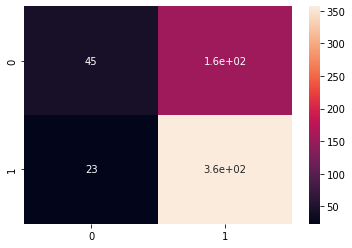

In [ ]:
predicted = model.predict(padded_test)

prediction = []
for i in predicted:
  prediction.append(np.argmax(i))

original = []
for i in y_test_cat:
  original.append(np.argmax(i))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)